In [36]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [57]:
# MTA turnstile data for May 2019 and first week of June 2018
link_prefix = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
dates = [190504, 190511, 190518, 190525, 190601]
files = []

for i in range(len(dates)):
    files.append(link_prefix + str(dates[i]) + ".txt")

dfs = [pd.read_csv(f, 
                   usecols = ['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME', 'ENTRIES', 'EXITS                                                               ']) for f in files]

df = pd.concat(dfs)
df.shape

(1026784, 8)

In [58]:
df.rename(columns = {
    'C/A': 'area',
    'UNIT': 'unit',
    'SCP': 'scp',
    'STATION': 'station',
    'DATE': 'date',
    'TIME': 'time',
    'ENTRIES': 'entries',
    'EXITS                                                               ': 'exits'},
    inplace = True)


In [60]:
df.sort_values(['station','area','unit','scp','date','time'], inplace=True)
df.head(30)

,area,unit,scp,station,date,time,entries,exits
31049,H007,R248,00-00-00,1 AV,04/27/2019,00:00:00,14647394,16373694
31050,H007,R248,00-00-00,1 AV,04/27/2019,04:00:00,14647394,16373709
31051,H007,R248,00-00-00,1 AV,04/27/2019,08:00:00,14647395,16373732
31052,H007,R248,00-00-00,1 AV,04/27/2019,12:00:00,14647395,16373766
31053,H007,R248,00-00-00,1 AV,04/27/2019,16:00:00,14647395,16373800
31054,H007,R248,00-00-00,1 AV,04/27/2019,20:00:00,14647395,16373826
31055,H007,R248,00-00-00,1 AV,04/28/2019,00:00:00,14647395,16373849
31056,H007,R248,00-00-00,1 AV,04/28/2019,04:00:00,14647395,16373865
31057,H007,R248,00-00-00,1 AV,04/28/2019,08:00:00,14647395,16373883
31058,H007,R248,00-00-00,1 AV,04/28/2019,12:00:00,14647395,16373909


In [82]:
#We can combine all three to create a unique ID for any turnstile
df['unit_id'] = df.scp+' '+df.area +' '+df.unit

# Create datetime variable
df['DateTime'] = pd.to_datetime(df.date+' '+df.time)

#Record what day of the week each entry is from
df['Day'] = df.DateTime.dt.day_name()

#Calculate the entries/exits in a four hour period by finding the difference between rows
df['four hour entries'] = df.groupby('unit_id').entries.diff().values
df['four hour exits'] = df.groupby('unit_id').exits.diff().values

#Replace NaN, negative values, and impossibly large values by the average of the turnstile
df['four hour entries'].fillna(-1, inplace=True)
df['four hour exits'].fillna(-1, inplace=True)
df['four hour entries'] = df.groupby(['unit_id','area'])['four hour entries'].transform(
        lambda x: np.where((x<0)|(x>20000),x.mask((x<0)|(x>20000)).mean(),x))
df['four hour exits'] = df.groupby(['unit_id','area'])['four hour exits'].transform(
        lambda x: np.where((x<0)|(x>20000),x.mask((x<0)|(x>20000)).mean(),x))
df.head()

,area,unit,scp,station,date,time,entries,exits,unit_id,four hour entries,four hour exits,total flow,DateTime,Day
31049,H007,R248,00-00-00,1 AV,04/27/2019,00:00:00,14647394,16373694,00-00-00 H007 R248,255.634361,229.396476,485.030837,2019-04-27 00:00:00,Saturday
31050,H007,R248,00-00-00,1 AV,04/27/2019,04:00:00,14647394,16373709,00-00-00 H007 R248,170.000000,119.000000,289.000000,2019-04-27 04:00:00,Saturday
31051,H007,R248,00-00-00,1 AV,04/27/2019,08:00:00,14647395,16373732,00-00-00 H007 R248,47.000000,9.000000,56.000000,2019-04-27 08:00:00,Saturday
31052,H007,R248,00-00-00,1 AV,04/27/2019,12:00:00,14647395,16373766,00-00-00 H007 R248,55.000000,113.000000,168.000000,2019-04-27 12:00:00,Saturday
31053,H007,R248,00-00-00,1 AV,04/27/2019,16:00:00,14647395,16373800,00-00-00 H007 R248,48.000000,378.000000,426.000000,2019-04-27 16:00:00,Saturday


In [83]:
# Find total flow over 4 hour blocks
df['total flow'] = df['four hour entries']+df['four hour exits']
df.head()

,area,unit,scp,station,date,time,entries,exits,unit_id,four hour entries,four hour exits,total flow,DateTime,Day
31049,H007,R248,00-00-00,1 AV,04/27/2019,00:00:00,14647394,16373694,00-00-00 H007 R248,255.634361,229.396476,485.030837,2019-04-27 00:00:00,Saturday
31050,H007,R248,00-00-00,1 AV,04/27/2019,04:00:00,14647394,16373709,00-00-00 H007 R248,170.000000,119.000000,289.000000,2019-04-27 04:00:00,Saturday
31051,H007,R248,00-00-00,1 AV,04/27/2019,08:00:00,14647395,16373732,00-00-00 H007 R248,47.000000,9.000000,56.000000,2019-04-27 08:00:00,Saturday
31052,H007,R248,00-00-00,1 AV,04/27/2019,12:00:00,14647395,16373766,00-00-00 H007 R248,55.000000,113.000000,168.000000,2019-04-27 12:00:00,Saturday
31053,H007,R248,00-00-00,1 AV,04/27/2019,16:00:00,14647395,16373800,00-00-00 H007 R248,48.000000,378.000000,426.000000,2019-04-27 16:00:00,Saturday


In [84]:
#Find daily sum for each turnstile for each day of the week
df_daily = df.groupby(['unit_id', 'station','date'])
df_daily.head(50)

,area,unit,scp,station,date,time,entries,exits,unit_id,four hour entries,four hour exits,total flow,DateTime,Day
31049,H007,R248,00-00-00,1 AV,04/27/2019,00:00:00,14647394,16373694,00-00-00 H007 R248,255.634361,229.396476,485.030837,2019-04-27 00:00:00,Saturday
31050,H007,R248,00-00-00,1 AV,04/27/2019,04:00:00,14647394,16373709,00-00-00 H007 R248,170.000000,119.000000,289.000000,2019-04-27 04:00:00,Saturday
31051,H007,R248,00-00-00,1 AV,04/27/2019,08:00:00,14647395,16373732,00-00-00 H007 R248,47.000000,9.000000,56.000000,2019-04-27 08:00:00,Saturday
31052,H007,R248,00-00-00,1 AV,04/27/2019,12:00:00,14647395,16373766,00-00-00 H007 R248,55.000000,113.000000,168.000000,2019-04-27 12:00:00,Saturday
31053,H007,R248,00-00-00,1 AV,04/27/2019,16:00:00,14647395,16373800,00-00-00 H007 R248,48.000000,378.000000,426.000000,2019-04-27 16:00:00,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179175,R419,R326,00-05-01,ZEREGA AV,05/31/2019,05:00:00,39,148,00-05-01 R419 R326,0.000000,0.000000,0.000000,2019-05-31 05:00:00,Friday
179176,R419,R326,00-05-01,ZEREGA AV,05/31/2019,09:00:00,39,148,00-05-01 R419 R326,0.000000,0.000000,0.000000,2019-05-31 09:00:00,Friday
179177,R419,R326,00-05-01,ZEREGA AV,05/31/2019,13:00:00,39,148,00-05-01 R419 R326,0.000000,0.000000,0.000000,2019-05-31 13:00:00,Friday
179178,R419,R326,00-05-01,ZEREGA AV,05/31/2019,17:00:00,39,148,00-05-01 R419 R326,0.000000,0.000000,0.000000,2019-05-31 17:00:00,Friday


In [85]:
%matplotlib inline
import matplotlib.pyplot as plt

In [86]:
test = df.loc[df['unit_id']=='02-00-00 A002 R051'].groupby('day')['total flow'].sum()
test

date
04/27/2019    1488.00000
04/28/2019    1720.00000
04/29/2019     879.00000
04/30/2019    1345.00000
05/01/2019    1763.00000
05/02/2019    2337.00000
05/03/2019    2128.00000
05/04/2019     379.00000
05/05/2019     754.00000
05/06/2019    1112.00000
05/07/2019    1699.00000
05/08/2019    1283.00000
05/09/2019     680.00000
05/10/2019    1288.00000
05/11/2019    1129.00000
05/12/2019    1607.00000
05/13/2019    1093.00000
05/14/2019     741.00000
05/15/2019    2450.00000
05/16/2019    1866.00000
05/17/2019    2360.00000
05/18/2019     780.00000
05/19/2019     665.00000
05/20/2019    2568.71028
05/21/2019    1438.00000
05/22/2019    1673.00000
05/23/2019    1554.00000
05/24/2019    2260.00000
05/25/2019    1122.00000
05/26/2019    3173.00000
05/27/2019    2131.00000
05/28/2019    1659.00000
05/29/2019    2254.00000
05/30/2019    1176.00000
05/31/2019    3498.00000
Name: total flow, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

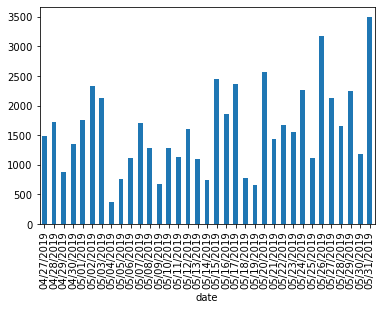

In [91]:
test.plot(x='day', y='counts',kind="bar")
plt.show